In [2]:
# Reading in the dataset
import pandas as pd
import numpy as np
energy = pd.read_csv('PJME_hourly.csv', index_col=[0], parse_dates=[0])
energy

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2010-06-15 08:00:00,34031.0
2010-06-15 09:00:00,36103.0
2010-06-15 10:00:00,37833.0


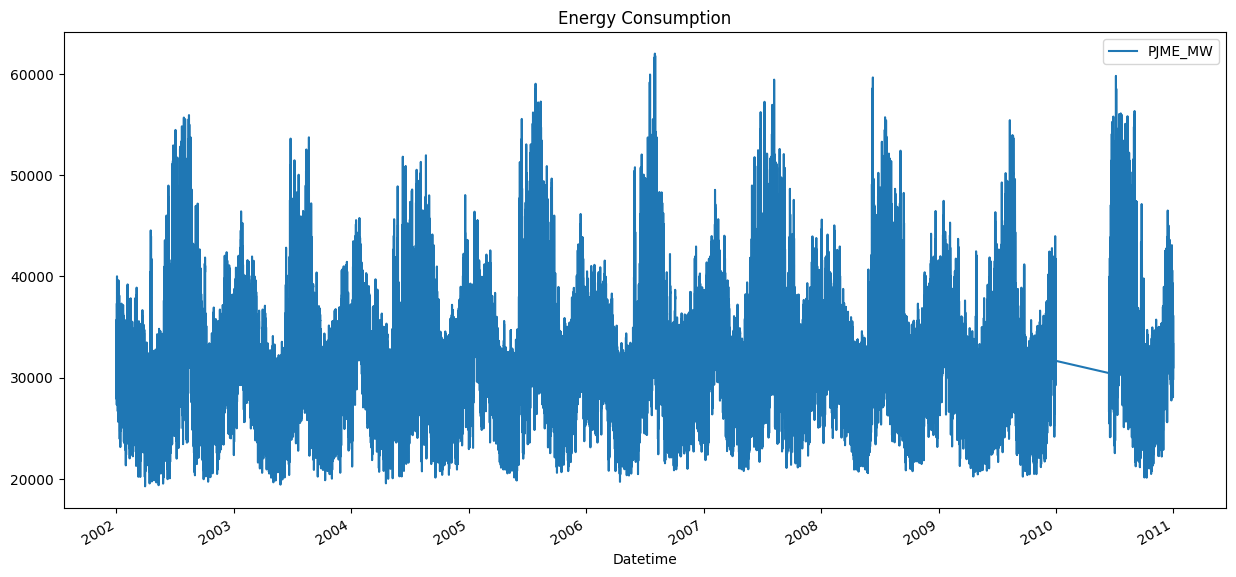

In [3]:
# First, lets plot it as a time series
import matplotlib.pyplot as plt
energy.plot(figsize=(15,7), title='Energy Consumption')
plt.show()

Now, let's extend hourly to daily, monthly, and so on.

In [4]:
def create_features(df, label=None):

    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear

    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(energy, label='PJME_MW')

features_and_target = pd.concat([X, y], axis=1)
features_and_target

<ipython-input-4-c7dae409be37>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0
...,...,...,...,...,...,...,...,...,...
2010-06-15 08:00:00,8,1,2,6,2010,166,15,24,34031.0
2010-06-15 09:00:00,9,1,2,6,2010,166,15,24,36103.0
2010-06-15 10:00:00,10,1,2,6,2010,166,15,24,37833.0


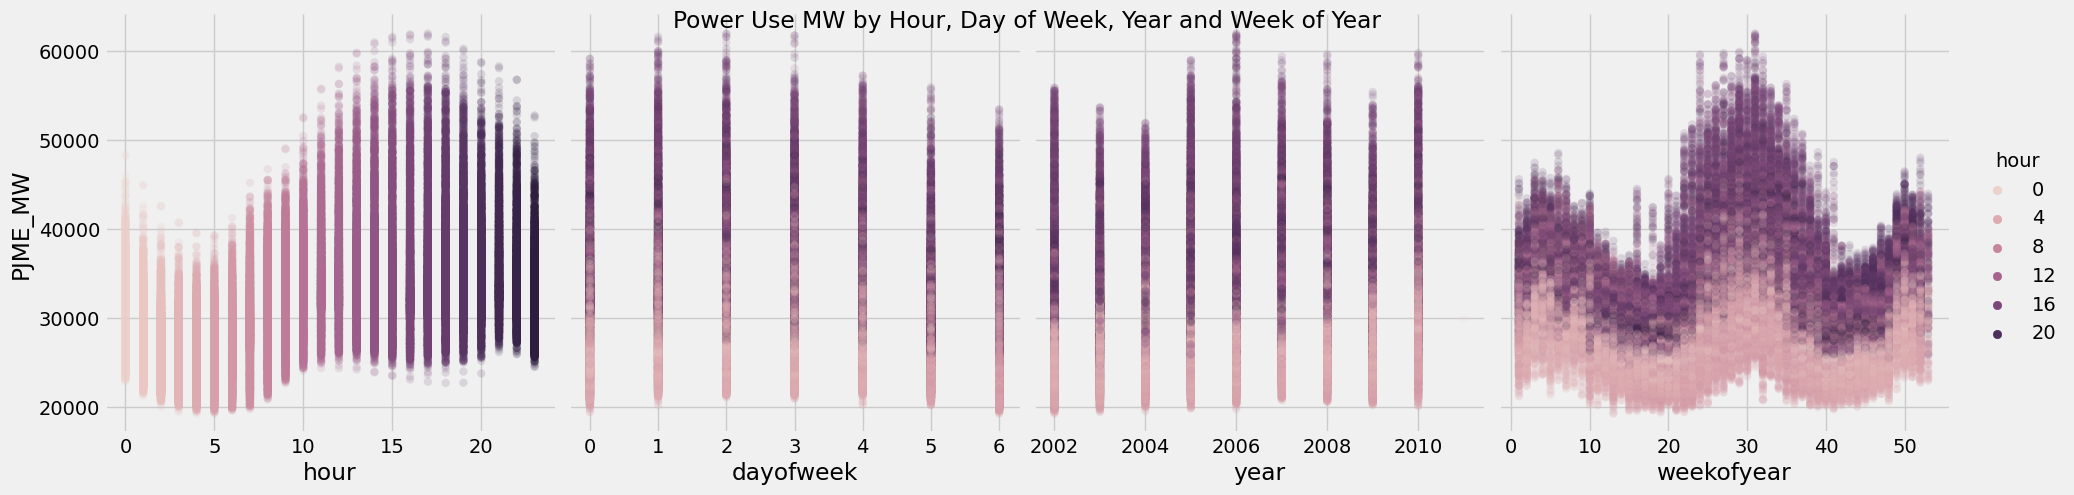

In [7]:
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='PJME_MW',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.show()

Now, I am going to try decomposing the data into its seasonal and trend components and see how much these components explain the data. I am going to decompose it into weekly, monthly, and yearly seasonal and trend components.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_weekly = seasonal_decompose(energy['PJME_MW'], model='additive', period=7)
decomposition_monthly = seasonal_decompose(energy['PJME_MW'], model='additive', period=30)
decomposition_yearly = seasonal_decompose(energy['PJME_MW'], model='additive', period=365)

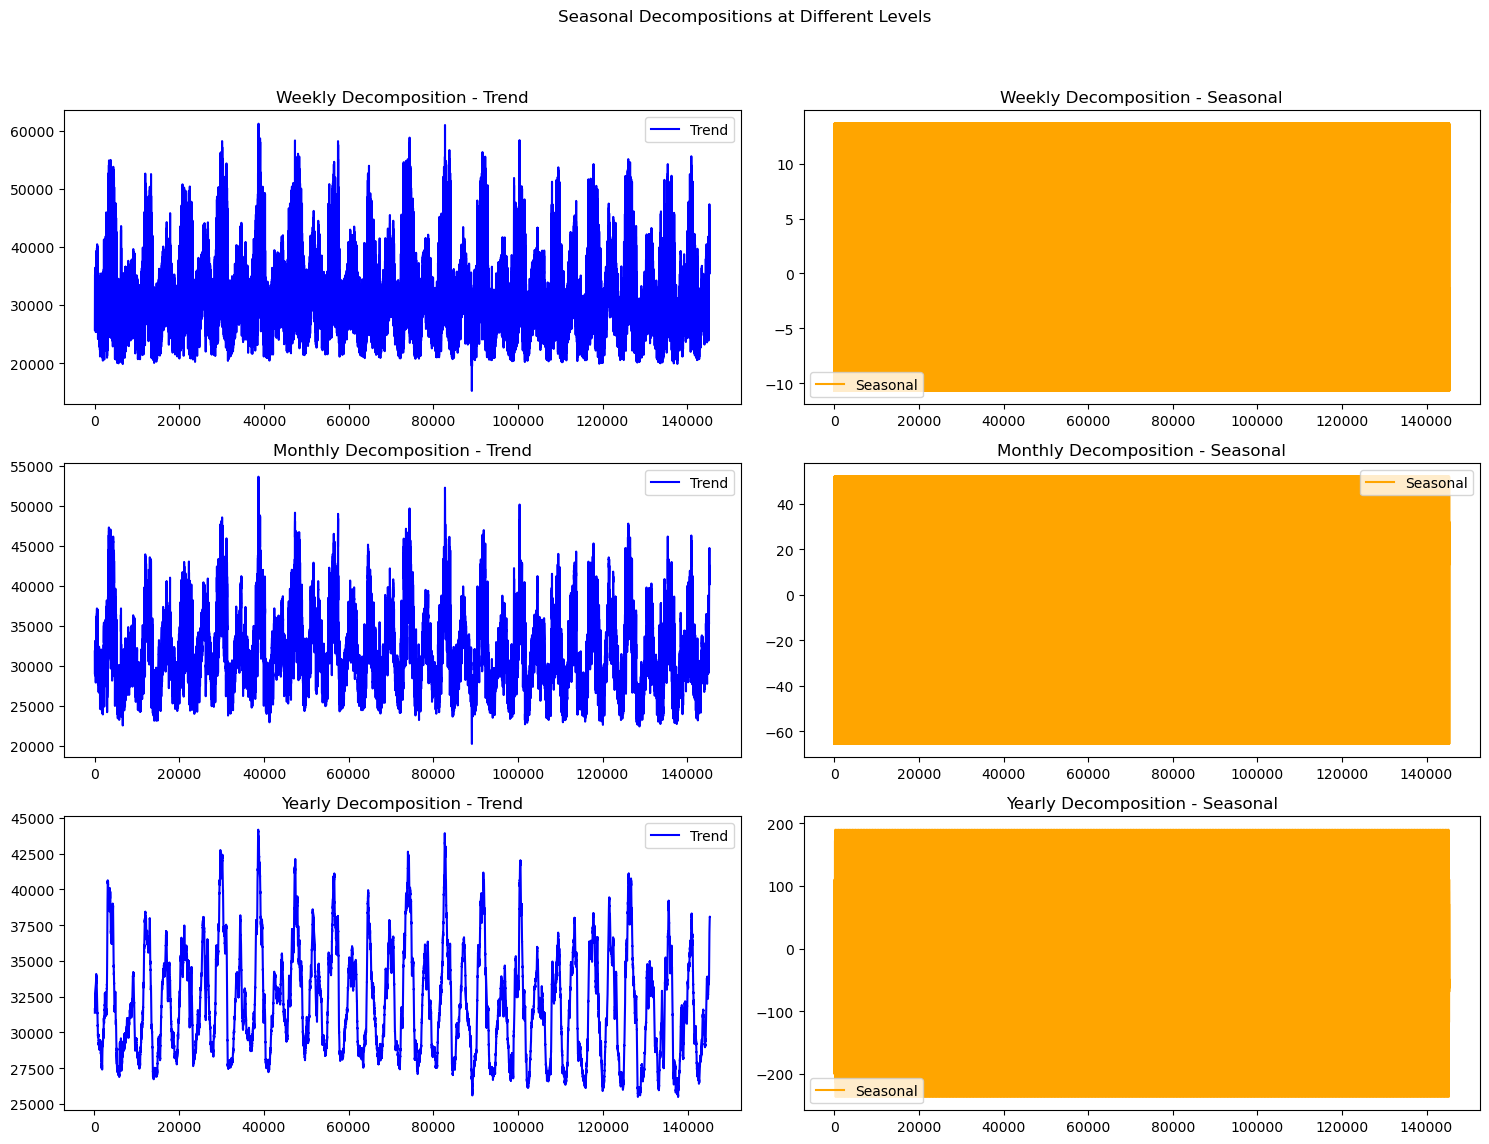

In [ ]:
# Plotting the decompositions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Seasonal Decompositions at Different Levels')

# Weekly Decomposition
axes[0, 0].plot(decomposition_weekly.trend, label='Trend', color='blue')
axes[0, 0].set_title('Weekly Decomposition - Trend')
axes[0, 0].legend(loc='best')
axes[0, 1].plot(decomposition_weekly.seasonal, label='Seasonal', color='orange')
axes[0, 1].set_title('Weekly Decomposition - Seasonal')
axes[0, 1].legend(loc='best')

# Monthly Decomposition
axes[1, 0].plot(decomposition_monthly.trend, label='Trend', color='blue')
axes[1, 0].set_title('Monthly Decomposition - Trend')
axes[1, 0].legend(loc='best')
axes[1, 1].plot(decomposition_monthly.seasonal, label='Seasonal', color='orange')
axes[1, 1].set_title('Monthly Decomposition - Seasonal')
axes[1, 1].legend(loc='best')

# Yearly Decomposition
axes[2, 0].plot(decomposition_yearly.trend, label='Trend', color='blue')
axes[2, 0].set_title('Yearly Decomposition - Trend')
axes[2, 0].legend(loc='best')
axes[2, 1].plot(decomposition_yearly.seasonal, label='Seasonal', color='orange')
axes[2, 1].set_title('Yearly Decomposition - Seasonal')
axes[2, 1].legend(loc='best')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Now let's combine all these trend and seasonal components to create an estimate of our time series.

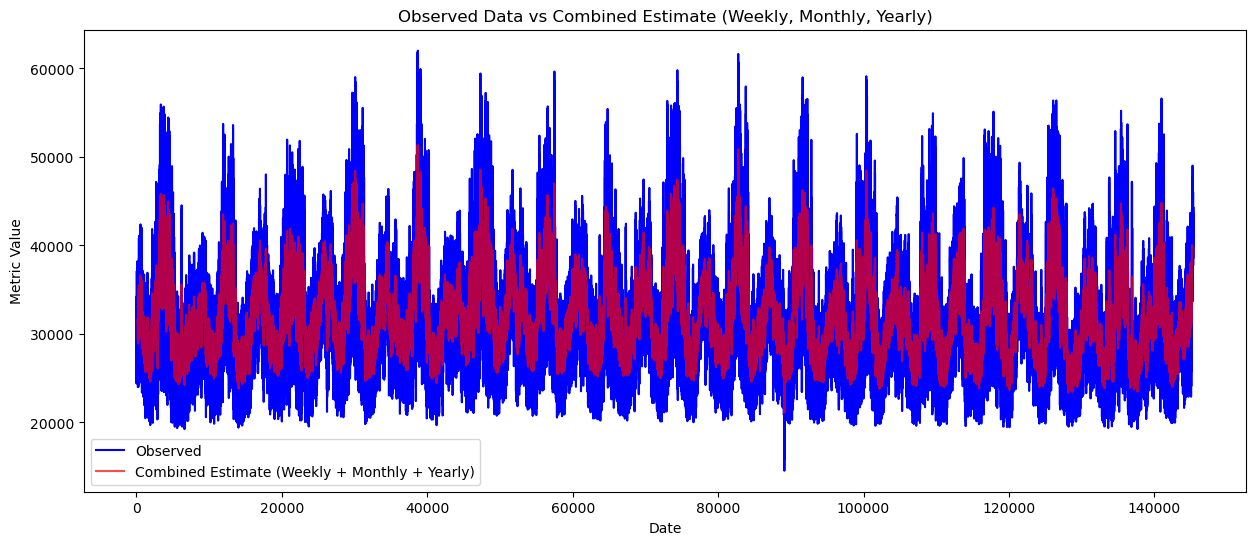

In [ ]:
combined_estimate = (decomposition_weekly.trend + decomposition_weekly.seasonal +
                     decomposition_monthly.trend + decomposition_monthly.seasonal +
                     decomposition_yearly.trend + decomposition_yearly.seasonal) / 3

# Plotting the observed data and the combined estimate
plt.figure(figsize=(15, 6))
plt.plot(energy['PJME_MW'], label='Observed', color='blue')
plt.plot(combined_estimate, label='Combined Estimate (Weekly + Monthly + Yearly)', color='red', alpha=0.7)
plt.legend(loc='best')
plt.title('Observed Data vs Combined Estimate (Weekly, Monthly, Yearly)')
plt.xlabel('Date')
plt.ylabel('Metric Value')
plt.show()

Let's look at the residuals.

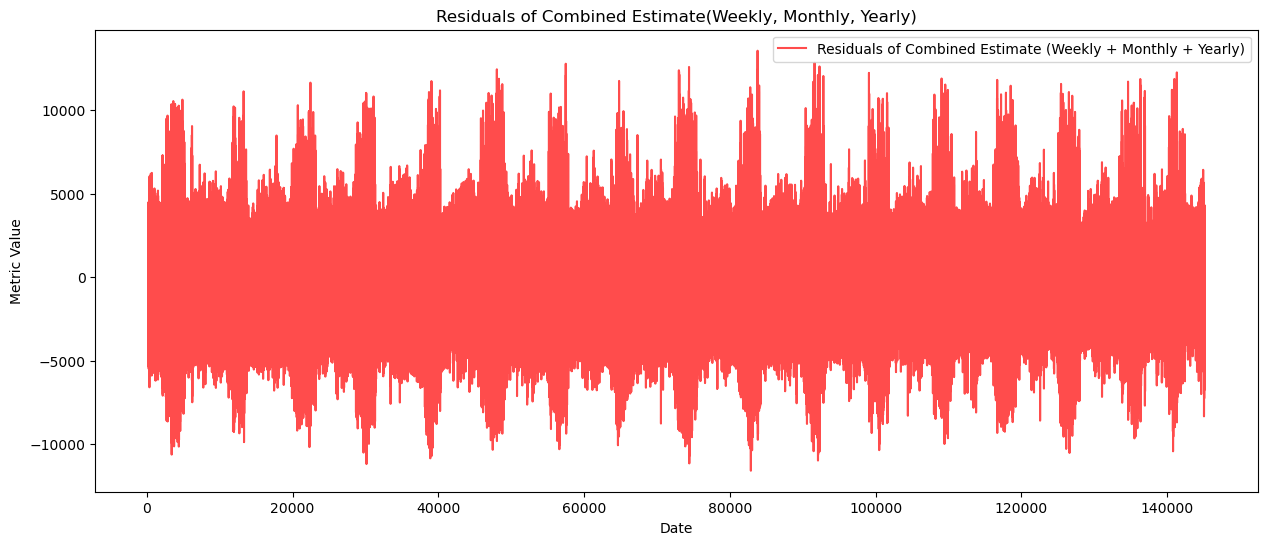

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(energy['PJME_MW'] - combined_estimate, label='Residuals of Combined Estimate (Weekly + Monthly + Yearly)', color='red', alpha=0.7)
plt.legend(loc='best')
plt.title('Residuals of Combined Estimate(Weekly, Monthly, Yearly)')
plt.xlabel('Date')
plt.ylabel('Metric Value')
plt.show()

As we can see, this estimate does capture the general trend of the data but it struggles to capture volatility. We will use Prophet as our predictive model. Prophet is good for this specific task because it has both a trend and seasonality component which we showed before does a decent job of estimating the data. We can also adjust Prophet's hyperparameters to make the predictions more volatile which the estimate struggles with. Prophet's model can be expressed as: $$y(t) = g(t) + s(t) + h(t) + \epsilon_t$$ g(t) is the trend component which is either piecewise linear or logistic, s(t) is the seasonality component which is modeled by a fourier series, and h(t) is the holiday component which accounts for irregular but impactful occurrences. $\epsilon_t$ is the random noise. The holiday component is also very important for this task of prediciting energy consumption. Holidays result in large fluctuations in energy demand and we want our model to account for those.



Additionally, the fact that Prophet's model has holidays built into the model is very helpful. As we say before, holidays do result in large fluctuations in energy demand and we want our model to account for those.

In [50]:
# Let's first format the data for Prophet
from prophet import Prophet
split_date = '01-Jan-2015'
energy_train = energy.loc[energy.index <= split_date].copy()
energy_test = energy.loc[energy.index > split_date].copy()

In [51]:
energy_train = energy_train.reset_index()
energy_train = energy_train.rename(columns={'Datetime':'ds','PJME_MW':'y'})
energy_train

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
113922,2014-01-01 20:00:00,36193.0
113923,2014-01-01 21:00:00,35601.0
113924,2014-01-01 22:00:00,34242.0
113925,2014-01-01 23:00:00,32215.0


In [53]:
energy_test = energy_test.reset_index()
energy_test = energy_test.rename(columns={'Datetime':'ds',
                     'PJME_MW':'y'})
energy_test

,index,ds,y
0,0,2015-12-31 01:00:00,24305.0
1,1,2015-12-31 02:00:00,23156.0
2,2,2015-12-31 03:00:00,22514.0
3,3,2015-12-31 04:00:00,22330.0
4,4,2015-12-31 05:00:00,22773.0
...,...,...,...
31434,31434,2018-01-01 20:00:00,44284.0
31435,31435,2018-01-01 21:00:00,43751.0
31436,31436,2018-01-01 22:00:00,42402.0
31437,31437,2018-01-01 23:00:00,40164.0


In [54]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

calendar = USFederalHolidayCalendar()

start_date = '2002-01-01'
end_date = '2018-08-03'

holidays = calendar.holidays(start=start_date, end=end_date)

holidays_df = pd.DataFrame({
    'holiday': 'US_holiday',
    'ds': pd.to_datetime(holidays),
    'lower_window': -3,
    'upper_window': 3,
})

thanksgiving = pd.date_range(start_date, end_date, freq="WOM-4THU")
thanksgiving = thanksgiving[thanksgiving.month == 11]
thanksgiving_df = pd.DataFrame({
    'holiday': 'Thanksgiving',
    'ds': thanksgiving,
    'lower_window': -3,
    'upper_window': 3,
})

holidays_df = pd.concat([holidays_df, thanksgiving_df]).reset_index(drop=True)

holidays_df.head()

,holiday,ds,lower_window,upper_window
0,US_holiday,2002-01-01,-3,3
1,US_holiday,2002-01-21,-3,3
2,US_holiday,2002-02-18,-3,3
3,US_holiday,2002-05-27,-3,3
4,US_holiday,2002-07-04,-3,3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1insc77/pq353suk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1insc77/w7ll5537.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68938', 'data', 'file=/tmp/tmpd1insc77/pq353suk.json', 'init=/tmp/tmpd1insc77/w7ll5537.json', 'output', 'file=/tmp/tmpd1insc77/prophet_model83pcjc8q/prophet_model-20240110052701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:27:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:32:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error: 16.63288267501824


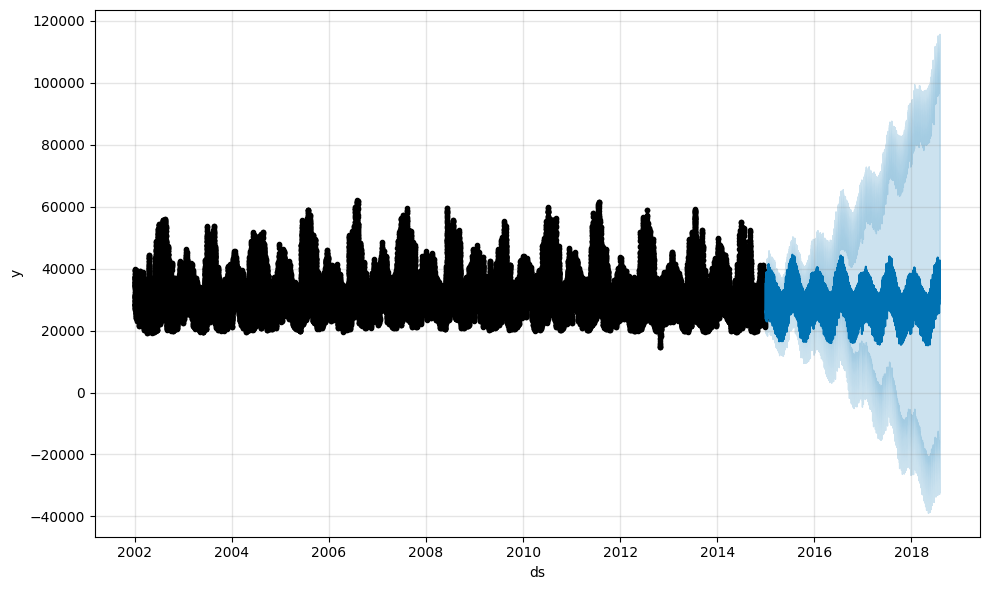

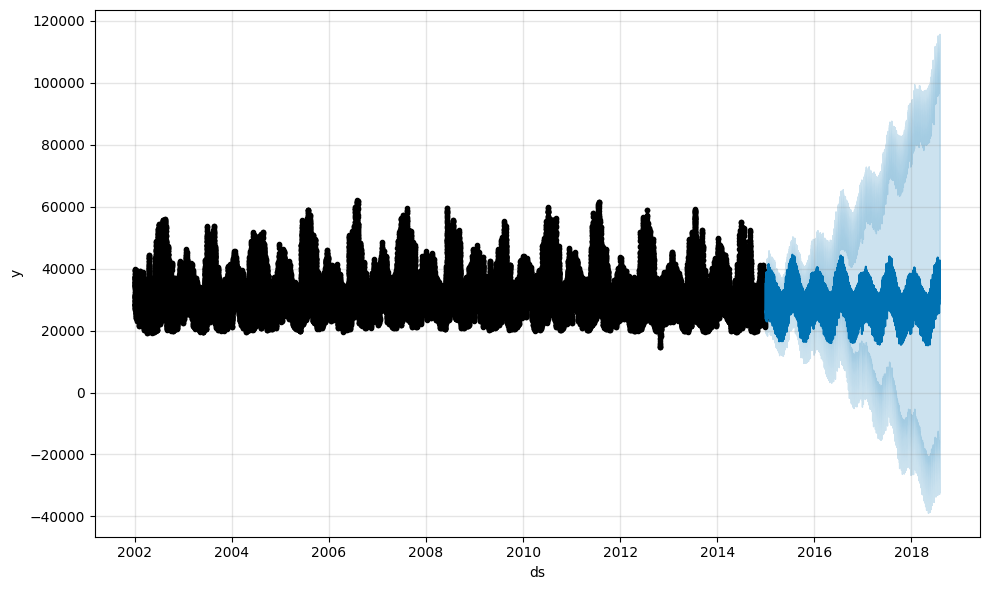

In [55]:
prophet_model = Prophet(changepoint_prior_scale = 0.5, holidays= holidays_df, holidays_prior_scale= 50, yearly_seasonality = 60).fit(energy_train)
future = pd.DataFrame({'ds': energy_test['ds']})

# Forecasting
forecast = prophet_model.predict(future)

# Merge the forecast with the actual values for evaluation
test_with_forecast = forecast.set_index('ds')[['yhat']]

# Evaluate the model
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(energy_test['y'], test_with_forecast['yhat'])
print('Mean Absolute Percentage Error:', mape)
prophet_model.plot(forecast)

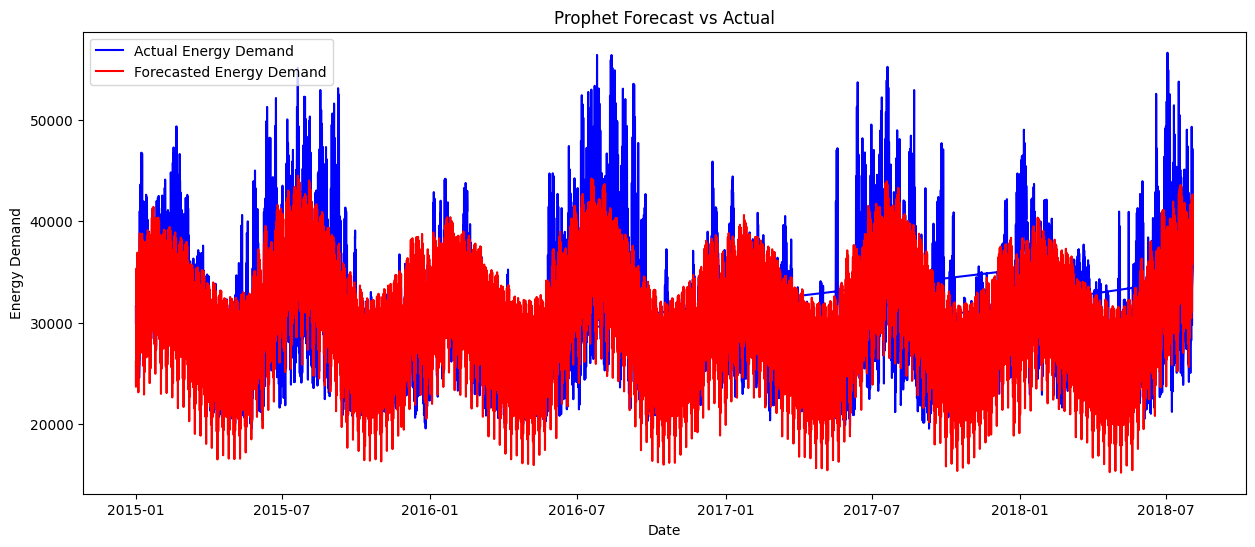

In [56]:
# Extract forecast and actual values for the test period
# Plotting the predictions and actual values

test = energy_test.set_index('ds')
plt.figure(figsize=(15, 6))
plt.plot(test['y'], label='Actual Energy Demand', color='blue')
plt.plot(test_with_forecast['yhat'], label='Forecasted Energy Demand', color='red')
plt.legend()
plt.title('Prophet Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.show()